# SES722 - Projet d'Econométrie

## Partie 1: Régression

Réalisation: **Anatoli de BRADKE** et **Raphael LEDERMAN**

Date: **Avril 2019**

## Imports

In [1]:
# General
import numpy as np
import pandas as pd
import itertools
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Graph
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
import seaborn as sns

# Statistics
from scipy import stats
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Fonctions basiques

In [2]:
# Functions to load data in a dataframe and display it
def load_data(filename, print_carac=True):

    # Load data into a dataframe
    df = pd.read_stata(filename)
    
    # Print dataframe caracteristics
    if print_carac is True:
        print("IMPORT DONE: '{}' contains {} rows and {} columns"
              .format(filename, df.shape[0], df.shape[1]))
    return df

# Histogram
def plot_hist(x, x_label, title, bins=50, kde=False, color='green', edge='white', linewidth=2, figsize=(20,10)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1,1,1)
    sns.distplot(x, hist=True, kde=kde, bins=bins, color = color,
                 hist_kws={'edgecolor':edge}, kde_kws={'linewidth': linewidth})
    plt.title(title, fontsize=22)
    plt.xlabel(x_label, fontsize=16)
    ob = offsetbox.AnchoredText(round(x.describe(), 2).reset_index().to_string(header=None, index=None),
                                prop={'fontweight':"bold", 'size': 14},  
                                loc=1)
    ax.add_artist(ob)
    plt.show()
    

## Question 1
Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [3]:
# Import des données
df = load_data('mroz.dta')

# Affiche les premières lignes
df.head(5)

IMPORT DONE: 'mroz.dta' contains 753 rows and 22 columns


,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1.0,1610.0,1.0,0.0,32.0,12.0,3.3540,2.65,2708.0,34.0,...,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0,10.910060,1.210154,196.0
1,1.0,1656.0,0.0,2.0,30.0,12.0,1.3889,2.65,2310.0,30.0,...,21800.0,0.6615,7.0,7.0,11.0,1.0,5.0,19.499981,0.328512,25.0
2,1.0,1980.0,1.0,3.0,35.0,12.0,4.5455,4.04,3072.0,40.0,...,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0,12.039910,1.514138,225.0
3,1.0,456.0,0.0,3.0,34.0,12.0,1.0965,3.25,1920.0,53.0,...,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0,6.799996,0.092123,36.0
4,1.0,1568.0,1.0,2.0,31.0,14.0,4.5918,3.60,2000.0,32.0,...,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0,20.100060,1.524272,49.0


In [4]:
# Selection des observations où le salaire est > 0
print("Nombre d'observations où 'wage' > 0: {}".format(df[df['wage'] > 0].shape[0]))
df = df[df['wage'] > 0]

Nombre d'observations où 'wage' > 0: 428


## Question 2
Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

### Salaire

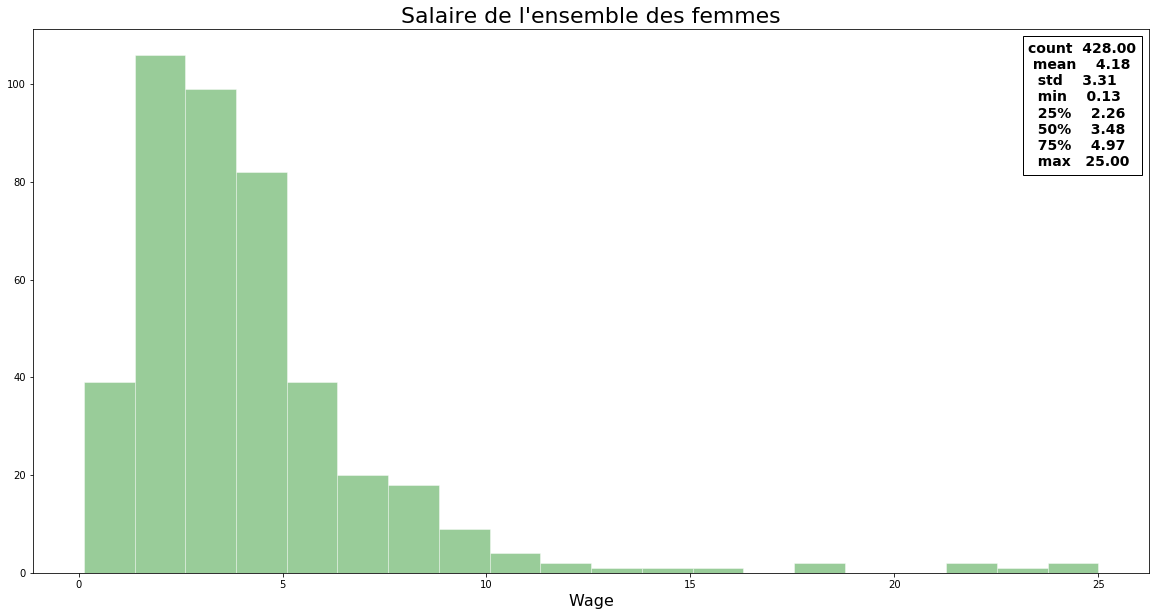

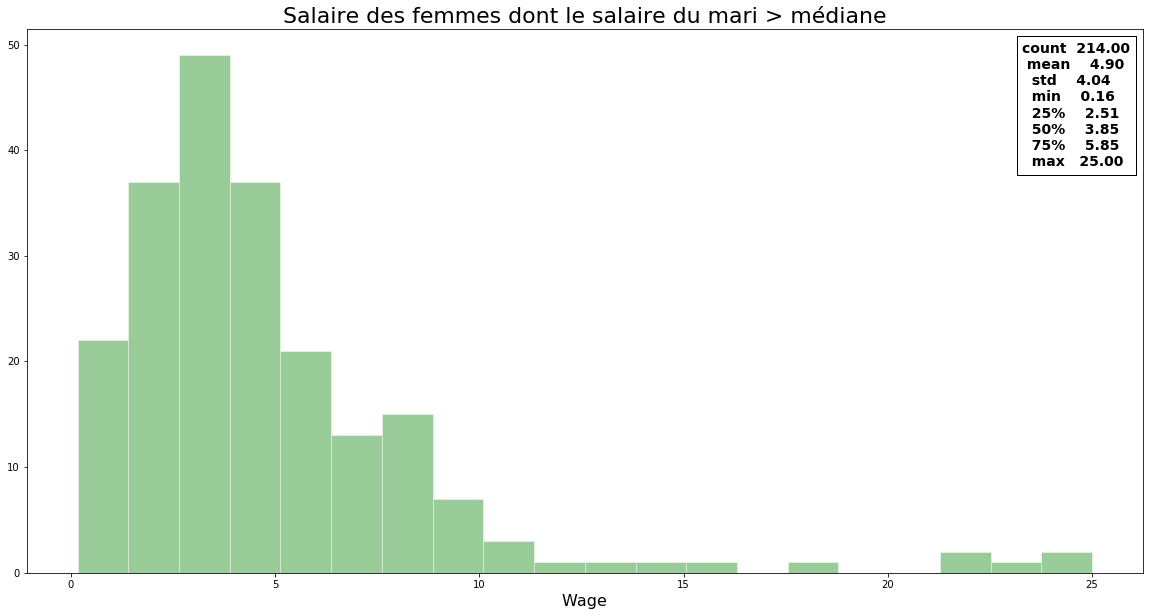

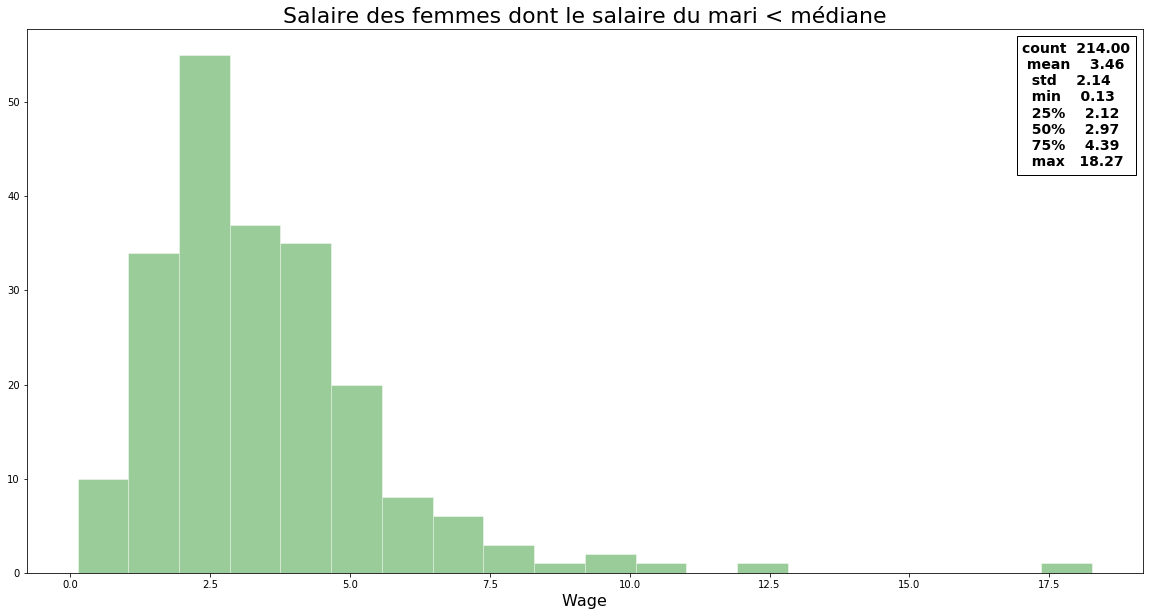

In [5]:
# Histogramme et statistiques descriptives du salaire pour toutes les femmes
plot_hist(df['wage'], 'Wage', "Salaire de l'ensemble des femmes", bins=20)

# Histogramme et statistiques descriptives du salaire pour les femmes dont le salaire du mari > médiane
plot_hist(df[df['huswage'] > df['huswage'].median()]['wage'], 'Wage', "Salaire des femmes dont le salaire du mari > médiane", bins=20)

# Histogramme et statistiques descriptives du salaire pour les femmes dont le salaire du mari < médiane
plot_hist(df[df['huswage'] < df['huswage'].median()]['wage'], 'Wage', "Salaire des femmes dont le salaire du mari < médiane", bins=20)


### Age

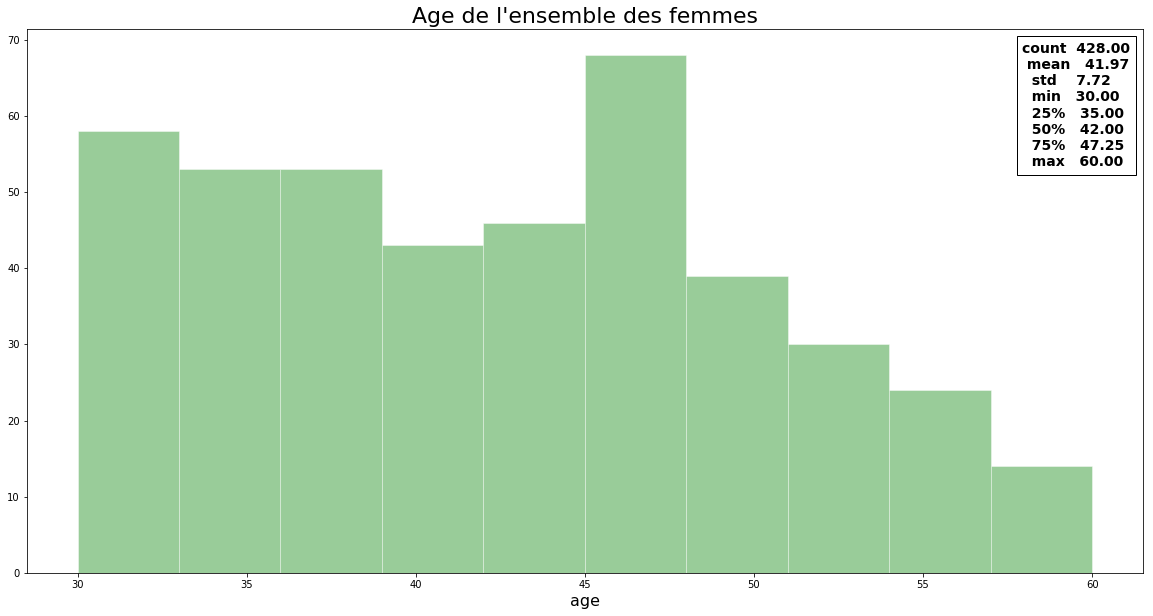

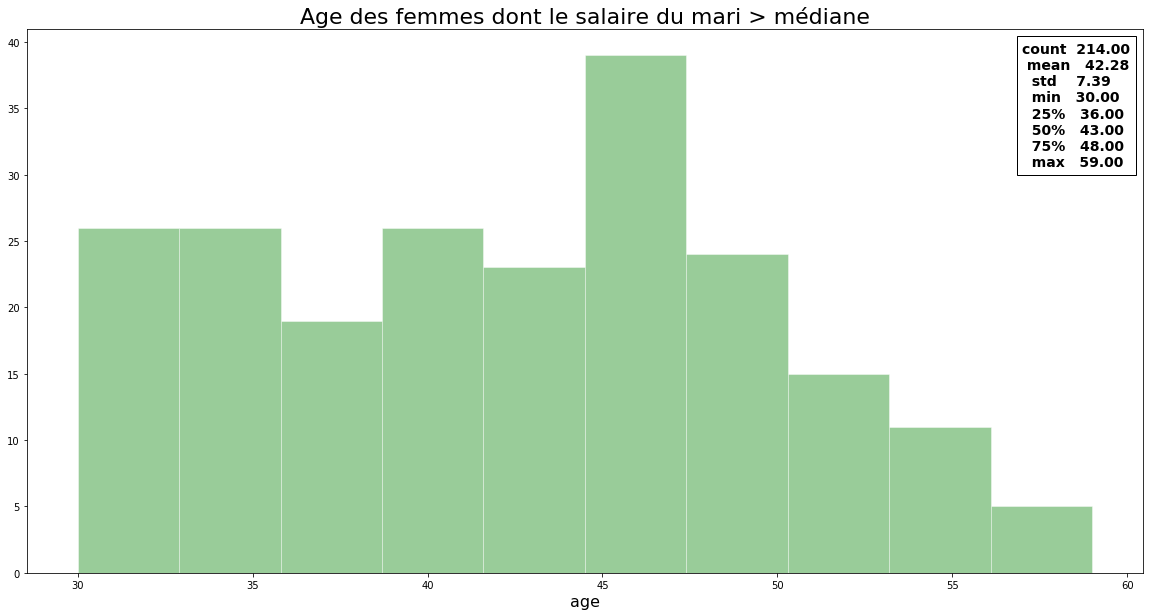

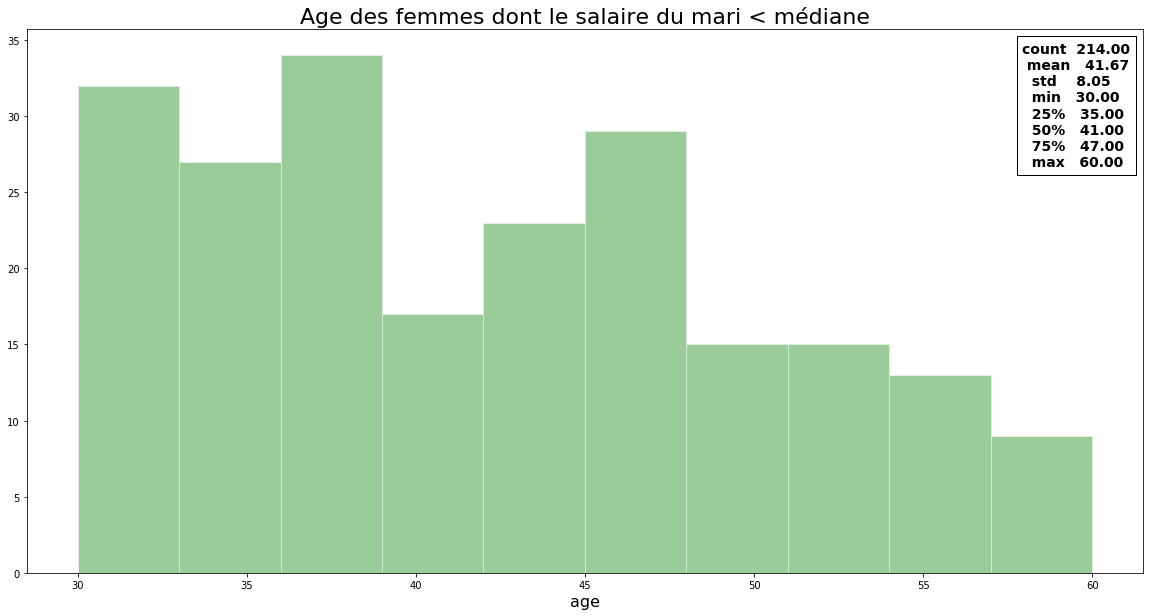

In [6]:
# Histogramme et statistiques descriptives de l'age pour toutes les femmes
plot_hist(df['age'], 'age', "Age de l'ensemble des femmes", bins=10)

# Histogramme et statistiques descriptives de l'age pour les femmes dont le salaire du mari > médiane
plot_hist(df[df['huswage'] > df['huswage'].median()]['age'], 'age', "Age des femmes dont le salaire du mari > médiane", bins=10)

# Histogramme et statistiques descriptives de l'age pour les femmes dont le salaire du mari < médiane
plot_hist(df[df['huswage'] < df['huswage'].median()]['age'], 'age', "Age des femmes dont le salaire du mari < médiane", bins=10)


### Education

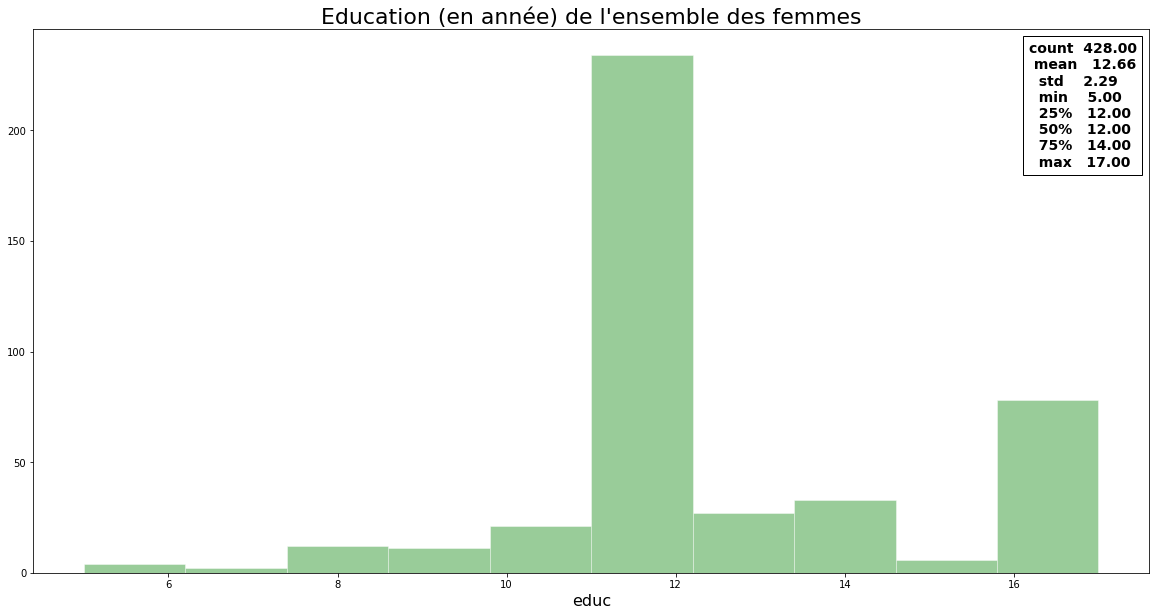

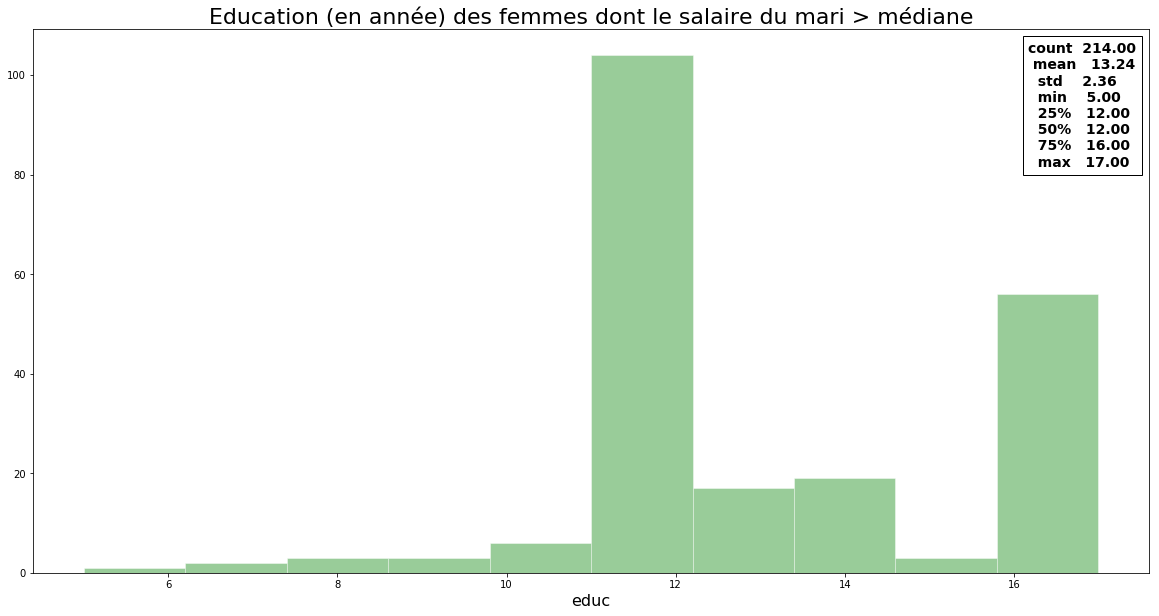

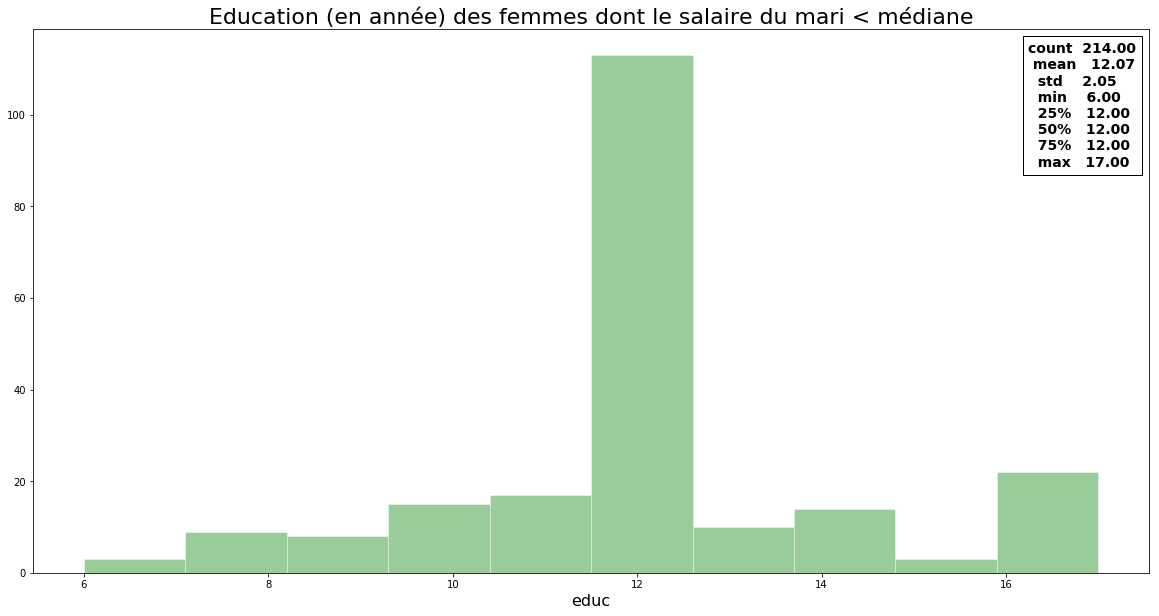

In [7]:
# Histogramme et statistiques descriptives de l'education (en année) pour toutes les femmes
plot_hist(df['educ'], 'educ', "Education (en année) de l'ensemble des femmes", bins=10)

# Histogramme et statistiques descriptives de l'education (en année) pour les femmes dont le salaire du mari > médiane
plot_hist(df[df['huswage'] > df['huswage'].median()]['educ'], 'educ', "Education (en année) des femmes dont le salaire du mari > médiane", bins=10)

# Histogramme et statistiques descriptives de l'education (en année) pour les femmes dont le salaire du mari < médiane
plot_hist(df[df['huswage'] < df['huswage'].median()]['educ'], 'educ', "Education (en année) des femmes dont le salaire du mari < médiane", bins=10)

## Question 3
Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

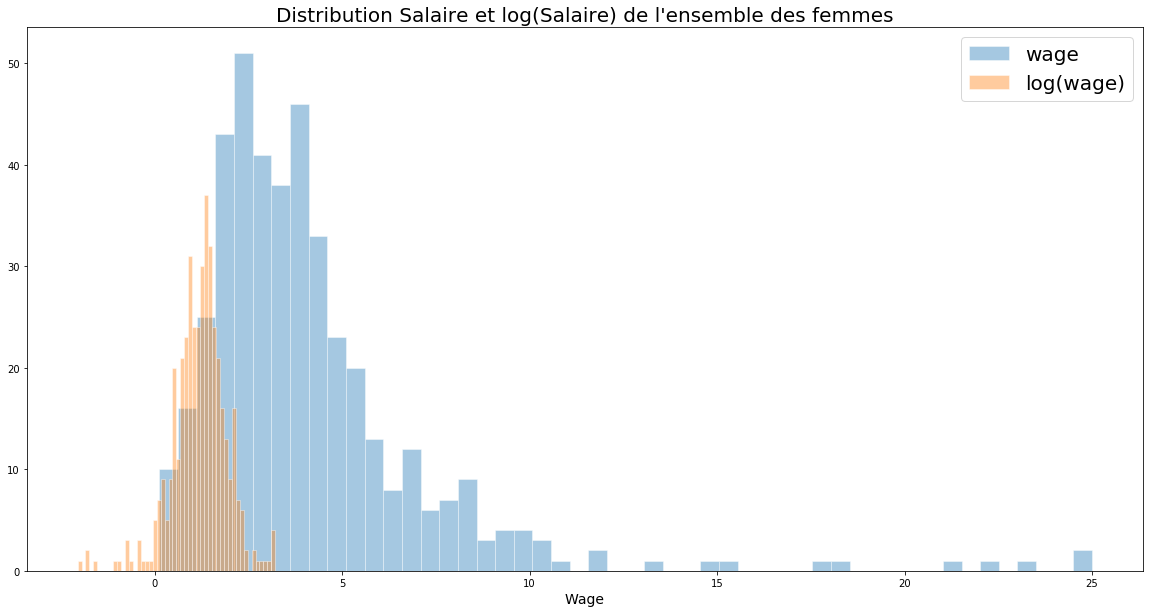

Statistiques descriptibes du Salaire et Log(Salaire):


,count,mean,std,min,25%,50%,75%,max
lwage,428.0,1.190173,0.723198,-2.054164,0.816509,1.247574,1.603571,3.218876
wage,428.0,4.177680,3.310283,0.128200,2.262600,3.481900,4.970750,25.000000


In [8]:
# Histogramme et statistiques descriptives du salaire pour toutes les femmes
fig = plt.figure(figsize=(20,10))
sns.distplot(df['wage'], hist=True, kde=False, bins=50,
                 hist_kws={'edgecolor':'white'}, kde_kws={'linewidth': 2}, label='wage')

# Histogramme et statistiques descriptives du log(salaire) pour toutes les femmes
sns.distplot(df['lwage'], hist=True, kde=False, bins=50,
                 hist_kws={'edgecolor':'white'}, kde_kws={'linewidth': 2}, label='log(wage)')

# Titre et labels
plt.title("Distribution Salaire et log(Salaire) de l'ensemble des femmes", fontsize=20)
plt.xlabel('Wage', fontsize=14)
plt.legend(fontsize = 20)
plt.show()

# Statistiques descriptives
print("Statistiques descriptibes du Salaire et Log(Salaire):")
df[['lwage', 'wage']].describe().T

## Question 4
Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [9]:
df[['motheduc','fatheduc']].corr()

,motheduc,fatheduc
motheduc,1.000000,0.554063
fatheduc,0.554063,1.000000


## Question 5
Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

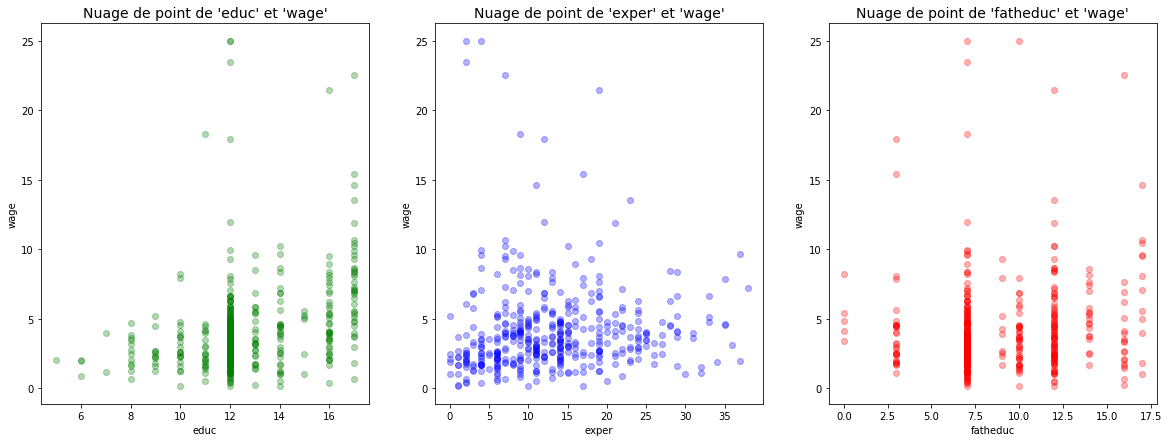

In [10]:
# Nuage de point entre wage et educ
plt.figure(figsize=(20,7))
plt.subplot(131)
plt.scatter(df['educ'], df['wage'], c='Green', alpha=0.3)
plt.title("Nuage de point de 'educ' et 'wage'", fontsize= 14)
plt.xlabel('educ')
plt.ylabel('wage')

# Nuage de point entre wage et exper
plt.subplot(132)
plt.scatter(df['exper'], df['wage'], c='Blue', alpha=0.3)
plt.title("Nuage de point de 'exper' et 'wage'", fontsize= 14)
plt.xlabel('exper')
plt.ylabel('wage')

# Nuage de point een wage et fatheduc
plt.subplot(133)
plt.scatter(df['fatheduc'], df['wage'], c='Red', alpha=0.3)
plt.title("Nuage de point de 'fatheduc' et 'wage'", fontsize= 14)
plt.xlabel('fatheduc')
plt.ylabel('wage')
plt.show()

## Question 6
Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le biais de variable omise.

*voir rapport*

## Question 7
Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus

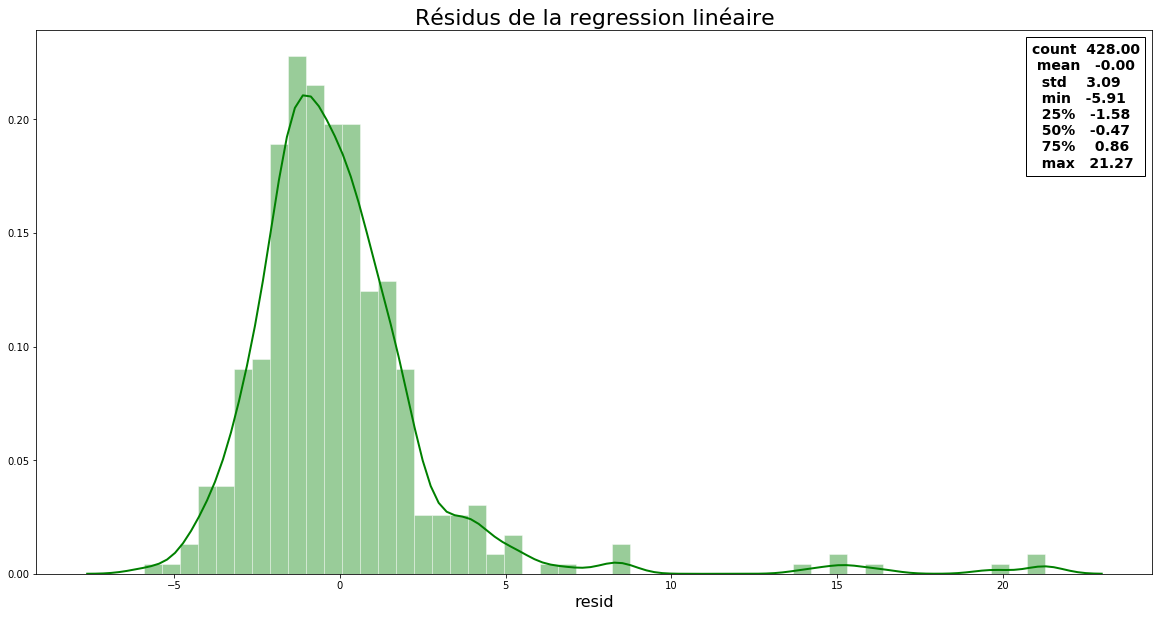

In [11]:
# Regression lineaire
Y = df['wage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()

# Histogramme des résidus
df['resid_1']= ols.resid
plot_hist(df['resid_1'], 'resid', "Résidus de la regression linéaire", bins=50, kde=True)

## Question 8
Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

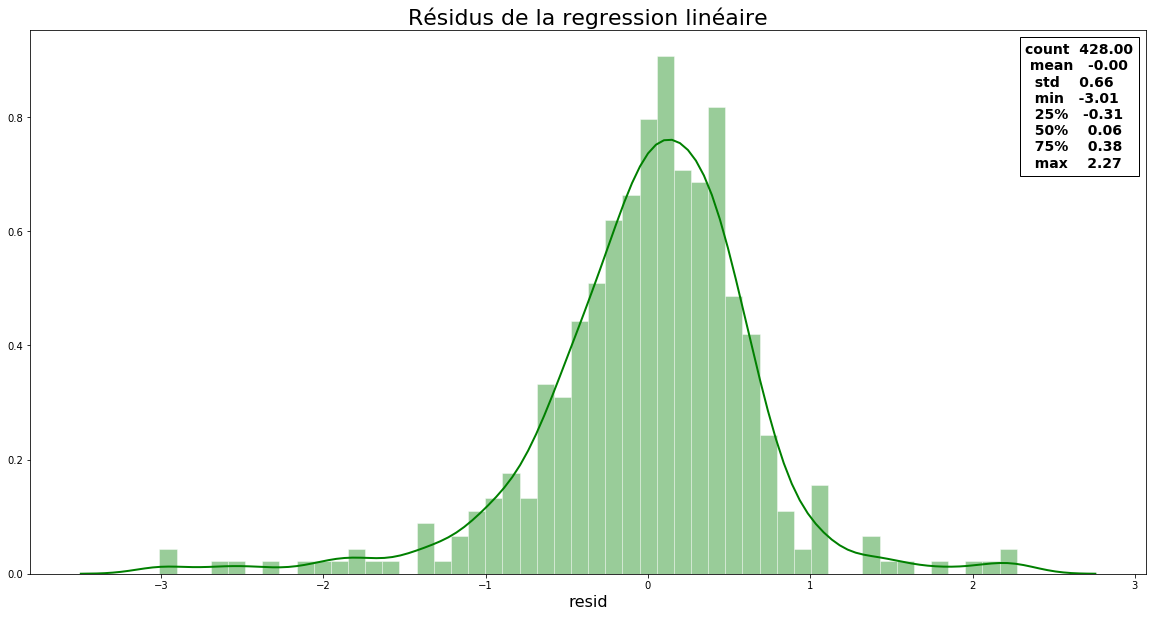

In [12]:
# Regression lineaire 
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()

# Histogramme des résidus
df['resid_2']= ols.resid
plot_hist(df['resid_2'], 'resid', "Résidus de la regression linéaire", bins=50, kde=True)

## Question 9
Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [13]:
# OLS summary
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           2.00e-13
Time:                        17:54:44   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

## Question 10
Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [14]:
# Statistique de test:
t = (ols.params['educ'] - 0.1) / ols.bse['educ']

# Seuil de validité du test à 5%
t_threshold = stats.t.ppf(1 - 0.025, df.shape[0] - 7)
p_value = 2 * (1 - stats.t.cdf(t, df.shape[0] - 7))

# Test
print("Peut-on rejeter l'hypothèse nulle [H0: Coeff educ = 10%]: {}".format(t > t_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Peut-on rejeter l'hypothèse nulle [H0: Coeff educ = 10%]: False
Related p-value: 88.0%


## Question 11
Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

In [15]:
# SSR modèle non contraint
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_nc = np.sum(ols.resid ** 2)
ddl_nc = df.shape[0] - X.shape[1] - 1

# SSR modèle contraint
Y = df['lwage'] - 0.1 * df['educ'] - 0.05 * df['exper']
X = df[['city','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - X.shape[1] - 1

# Statistique de test
F = ((SSR_c - SSR_nc)/ (ddl_c - ddl_nc)) / (SSR_nc / ddl_nc)

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl_c - ddl_nc, ddl_nc)
p_value = 1 - stats.f.cdf(F, ddl_c - ddl_nc, ddl_nc)

# Test de l'hypothese jointe H0: Coef educ=10% AND Coef exper=5%
print("Peut-on rejeter l'hypothèse jointe [H0: Coeff educ = 10% && Coeff exper = 5%]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))


Peut-on rejeter l'hypothèse jointe [H0: Coeff educ = 10% && Coeff exper = 5%]: True
Related p-value: 0.0%


## Question 12
De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

In [16]:
# Regression lineaire 
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()

# Affiche l'augmentation moyenne liée à 10 années d'expérience supplémentaire
print("Augmentation du log(salaire) avec 10 années d'expérience: {}%".format(round(100 * 10 * ols.params['exper']),2))

Augmentation du log(salaire) avec 10 années d'expérience: 15.0%


## Question 13
Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [17]:
# SSR modèle non contraint
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_nc = np.sum(ols.resid ** 2)
ddl_nc = df.shape[0] - X.shape[1] - 1

# SSR modèle contraint
Y = df['lwage']
df['kidslt6+kidsge6'] = df['kidslt6'] + df['kidsge6']
X = df[['city','educ','exper', 'nwifeinc', 'kidslt6+kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df.shape[0] - X.shape[1] - 1

# Statistique de test
F = ((SSR_c - SSR_nc)/ (ddl_c - ddl_nc)) / (SSR_nc / ddl_nc)

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl_c - ddl_nc, ddl_nc)
p_value = 1 - stats.f.cdf(F, ddl_c - ddl_nc, ddl_nc)

# Test de l'hypothese jointe H0: Coeff kidsgt6 = Coeff kidsge6
print("Peut-on rejeter l'hypothèse jointe [H0: Coeff kidsgt6 = Coeff kidsge6]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Peut-on rejeter l'hypothèse jointe [H0: Coeff kidsgt6 = Coeff kidsge6]: False
Related p-value: 71.0%


## Question 14
En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [18]:
# SSR modèle non contraint
Y = df['wage']
X = df[['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
Y = ols.resid ** 2
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_1 = np.sum(ols.resid ** 2)
ddl_1 = df.shape[0] - X.shape[1] - 1

# SSR modèle contraint
X = np.ones((df.shape[0], 1))
ols = sm.OLS(Y, X).fit()
SSR_2 = np.sum(ols.resid ** 2)
ddl_2 = df.shape[0] - X.shape[1] - 1

# Statistique de test
F = ((SSR_2 - SSR_1)/ (ddl_2 - ddl_1)) / (SSR_1 / ddl_1)

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl_2 - ddl_1, ddl_1)
p_value = 1 - stats.f.cdf(F, ddl_2 - ddl_1, ddl_1)

# Test de l'hypothese jointe H0: Coeff kidsgt6 = Coeff kidsge6
print("Peut-on rejeter l'hypothèse [H0: Homoscédasticité]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Peut-on rejeter l'hypothèse [H0: Homoscédasticité]: False
Related p-value: 9.0%


## Question 15
Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30 ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les p- valeurs.

### Femme de moins de 30 ans VS plus de 30 ans

In [19]:
# Femme de plus de 30 ans
df_sup_30 = df[df['age'] > 30]
Y = df_sup_30['lwage']
X = df_sup_30[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_1 = np.sum(ols.resid ** 2)
ddl_1 = df_sup_30.shape[0] - X.shape[1] - 1

# Femme de moins de 30 ans
df_inf_30 = df[df['age'] <= 30]
Y = df_inf_30['lwage']
X = df_inf_30[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_2 = np.sum(ols.resid ** 2)
ddl_2 = df_inf_30.shape[0] - X.shape[1] - 1

# Modèle non contraint
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR = np.sum(ols.resid ** 2)
ddl = df.shape[0] - X.shape[1] - 1

# Statistique de test de Chow
F = ((SSR - (SSR_1 + SSR_2))/ (ddl - (ddl_1 + ddl_2))) / ((SSR_1 + SSR_2) / (ddl_1 + ddl_2))

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl - (ddl_1 + ddl_2), ddl_1 + ddl_2)
p_value = 1 - stats.f.cdf(F, ddl - (ddl_1 + ddl_2), ddl_1 + ddl_2)

# Test de l'hypothese H0: SSR_nc = SSR_1 + SSR_2
print("Peut-on rejeter l'hypothèse [H0: Pas de rupture de tendance]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Peut-on rejeter l'hypothèse [H0: Pas de rupture de tendance]: False
Related p-value: 79.0%


### Femme entre 30 et 43 ans VS moins de 30 ans ou plus de 43 ans

In [20]:
# Femme entre 30 ans et 43 ans
df_enter_30_43 = df[(df['age'] > 30) & (df['age'] < 43)]
Y = df_enter_30_43['lwage']
X = df_enter_30_43[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_1 = np.sum(ols.resid ** 2)
ddl_1 = df_enter_30_43.shape[0] - X.shape[1] - 1

# Femme de moins de 30 ans ou de plus de 43 ans
df_non_enter_30_43 = df[(df['age'] <=30) | (df['age'] >= 43)]
Y = df_non_enter_30_43['lwage']
X = df_non_enter_30_43[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_2 = np.sum(ols.resid ** 2)
ddl_2 = df_non_enter_30_43.shape[0] - X.shape[1] - 1

# Modèle non contraint
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_nc = np.sum(ols.resid ** 2)
ddl_nc = df.shape[0] - X.shape[1] - 1

# Statistique de test de Chow
F = ((SSR_nc - (SSR_1 + SSR_2)) / (ddl_nc - (ddl_1 + ddl_2))) / ((SSR_1 + SSR_2) / (ddl_1 + ddl_2))

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl_nc - (ddl_1 + ddl_2), ddl_1 + ddl_2)
p_value = 1 - stats.f.cdf(F, ddl_nc - (ddl_1 + ddl_2), ddl_1 + ddl_2)

# Test de l'hypothese H0: SSR_nc = SSR_1 + SSR_2
print("Peut-on rejeter l'hypothèse [H0: Pas de rupture de tendance]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Peut-on rejeter l'hypothèse [H0: Pas de rupture de tendance]: False
Related p-value: 61.0%


### Femme de moins de 43 ans VS plus de 43 ans

In [21]:
# Femme de plus de 43 ans
df_sup_43 = df[df['age'] >= 43]
Y = df_sup_43['lwage']
X = df_sup_43[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_1 = np.sum(ols.resid ** 2)
ddl_1 = df_sup_43.shape[0] - X.shape[1] - 1

# Femme de moins de 43 ans
df_inf_43 = df[df['age'] < 43]
Y = df_inf_43['lwage']
X = df_inf_43[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_2 = np.sum(ols.resid ** 2)
ddl_2 = df_inf_43.shape[0] - X.shape[1] - 1

# Modèle non contraint
Y = df['lwage']
X = df[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_nc = np.sum(ols.resid ** 2)
ddl_nc = df.shape[0] - X.shape[1] - 1

# Statistique de test de Chow
F = ((SSR_nc - (SSR_1 + SSR_2))/ (ddl_nc - (ddl_1 + ddl_2))) / ((SSR_1 + SSR_2) / (ddl_1 + ddl_2))

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl_nc - (ddl_1 + ddl_2), ddl_1 + ddl_2)
p_value = 1 - stats.f.cdf(F, ddl_nc - (ddl_1 + ddl_2), ddl_1 + ddl_2)

# Test de l'hypothese H0: SSR_nc = SSR_1 + SSR_2
print("Peut-on rejeter l'hypothèse [H0: Pas de rupture de tendance]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Peut-on rejeter l'hypothèse [H0: Pas de rupture de tendance]: False
Related p-value: 31.0%


## Question 16
A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs


In [22]:
# Création des variables binaire
df['kidslt6'] = df['kidslt6'].astype(int)
df_dummies = pd.get_dummies(df, prefix='kidslt6', columns=['kidslt6'])

In [23]:
# Création des variables binaire pour les enfants < 6 ans
df['kidslt6'] = df['kidslt6'].astype(int)
df_dummies = pd.get_dummies(df, prefix='kidslt6', columns=['kidslt6'])

# Création de la variable binaire pour les enfants > 6 ans
df_dummies['kidsge6_1'] =  np.where(df['kidsge6'] == 0, 0, 1)

# Regression linéaire 
Y = df_dummies['lwage']
X = df_dummies[['city','educ','exper','nwifeinc', 'kidsge6_1', 'kidslt6_0', 'kidslt6_1', 'kidslt6_2']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()

# Summary
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     11.03
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           8.15e-13
Time:                        17:54:45   Log-Likelihood:                -432.00
No. Observations:                 428   AIC:                             880.0
Df Residuals:                     420   BIC:                             912.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3456      0.172     -2.014      0.0

## Question 17
A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Interprétez les coefficients estimés.

In [24]:
# Import de l'échantillon global
df_full = load_data('mroz.dta')

# Regression
Y = df_full['inlf']
X = df_full[['city', 'educ', 'age', 'kidslt6', 'kidsge6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()
print(ols.summary())

IMPORT DONE: 'mroz.dta' contains 753 rows and 22 columns
                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     21.20
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           7.29e-20
Time:                        17:54:45   Log-Likelihood:                -489.44
No. Observations:                 753   AIC:                             990.9
Df Residuals:                     747   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Question 18
Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. Comparez le résultat du test à celuir de la question 18.

In [25]:
# SSR modèle non contraint
Y = df_full[['inlf']].values
X = df_full[['city', 'educ', 'age', 'kidslt6', 'kidsge6']].assign(const=1.).values
probit = Probit(Y, X)
probit = probit.fit()
SSR_nc = np.sum((Y - probit.predict(X).reshape(-1, 1)) ** 2)
ddl_nc = df_full.shape[0] - X.shape[1]

# SSR modèle contraint
Y = df_full[['inlf']].values
X = df_full[['city', 'educ', 'age']].assign(const=1.).values
probit = Probit(Y, X)
probit = probit.fit()
SSR_c = np.sum((Y - probit.predict(X).reshape(-1, 1)) ** 2)
ddl_c = df_full.shape[0] - X.shape[1]

# Statistique de test
F = ((SSR_c - SSR_nc)/ (ddl_c - ddl_nc)) / (SSR_nc / ddl_nc)

# Seuil de validité du test à 5%
F_threshold = stats.f.ppf(0.95, ddl_c - ddl_nc, ddl_nc)
p_value = 1 - stats.f.cdf(F, ddl_c - ddl_nc, ddl_nc)

# Test de l'hypothese jointe H0: Coeff kidsgt6 = Coeff kidsge6
print("Peut-on rejeter l'hypothèse jointe [H0: Coeff kidsgt6 = Coeff kidsge6 = 0]: {}".format(F > F_threshold))
print("Related p-value: {}%".format(round(100 * p_value)))

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663577
         Iterations 4
Peut-on rejeter l'hypothèse jointe [H0: Coeff kidsgt6 = Coeff kidsge6 = 0]: True
Related p-value: 0.0%


## Question 19
Calculer les effets partiels pour l'ensemble des variables explicatives : p(y1)/xk (k = 1, ..., K), où K est le nombre de variables explicatives. Comparer vos résultats à ceux obtenus à la question 17. Commentez.

In [26]:
# Modèle Probit
Y = df_full[['inlf']].values
X = df_full[['city', 'educ', 'age', 'kidslt6', 'kidsge6']].assign(const=1.).values
probit = Probit(Y, X)
probit = probit.fit()
print(probit.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
       Probit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0304      0.036     -0.843      0.399      -0.101       0.040
x2             0.0435      0.007      5.811      0.000       0.029       0.058
x3            -0.0132      0.003     -5.264      0.000      -0.018      -0.008
x4            -0.3116      0.035     -9.006      0.000      -0.379      -0.244
x5            -0.0191      0.014     -1.355      0.175      -0.047       0.009


## Question 20
Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 en utilisant la méthode du rapport de vraisemblance. Comparez aux résultazts de la question 18.

In [27]:
# Log-Likelihood du modèle non contraint
Y = df_full[['inlf']].values
X = df_full[['city', 'educ', 'age', 'kidslt6', 'kidsge6']].assign(const=1.).values
probit = Probit(Y, X)
probit = probit.fit()
L_nc = probit.llf
print(probit.summary())

Optimization terminated successfully.
         Current function value: 0.617205
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:                 0.09734
Time:                        17:54:45   Log-Likelihood:                -464.76
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 4.714e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0863      0.102     -0.842      0.400      -0.287       0.115
x2             0.1234      0.

In [28]:
# Log-Likelihood du modèle contraint
Y = df_full[['inlf']].values
X = df_full[['city', 'educ', 'age']].assign(const=1.).values
probit = Probit(Y, X)
probit = probit.fit()
L_c = probit.llf
print(probit.summary())

Optimization terminated successfully.
         Current function value: 0.663577
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  753
Model:                         Probit   Df Residuals:                      749
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:                 0.02952
Time:                        17:54:45   Log-Likelihood:                -499.67
converged:                       True   LL-Null:                       -514.87
                                        LLR p-value:                 1.137e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0839      0.099     -0.847      0.397      -0.278       0.110
x2             0.1072      0.

In [29]:
# Statistique de test
RV = 2 * (L_nc - L_c)

# P-value
p_value = 1 - stats.chi2.cdf(RV, 2)

# Test de [H0: coeff = kidslt6 == coeff kidsge6 == 0]
print("Peut-on rejeter l'hypothèse [H0: coeff = kidslt6 == coeff kidsge6 == 0]: {}".format(p_value < 0.05))

Peut-on rejeter l'hypothèse [H0: coeff = kidslt6 == coeff kidsge6 == 0]: True
